# 3D Stegnography using Differential Shifting and Logistic Map

![3dimage](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs12652-019-01179-4/MediaObjects/12652_2019_1179_Fig10_HTML.png)

## Importing necessary libraries

In [ ]:
# installing necessary libraies

!pip install plyfile
!pip install open3d
!pip install pyntcloud
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 422.4 MB 7.1 kB/s 
     |████████████████████████████████| 3.2 MB 54.8 MB/s 
     |████████████████████████████████| 9.9 MB 54.0 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 53.4 MB/s 
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 35.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import open3d as o3d 
import numpy as np
import math
from pyntcloud import PyntCloud
from plyfile import PlyData, PlyElement
import random

## Downloading test images

In [ ]:
!gdown https://drive.google.com/uc?id=1Qe9qCTycTuxVPioMgDJTfdHsptY6BeA2

Downloading...
From: https://drive.google.com/uc?id=1Qe9qCTycTuxVPioMgDJTfdHsptY6BeA2
To: /content/bun_zipper.ply
100% 3.03M/3.03M [00:00<00:00, 256MB/s]


## Setting up the 3d Images

The sources are taken from Stanford 3D Scan data source: [Check Here](https://graphics.stanford.edu/data/3Dscanrep/)

![horse](https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs12652-019-01179-4/MediaObjects/12652_2019_1179_Fig1_HTML.png)

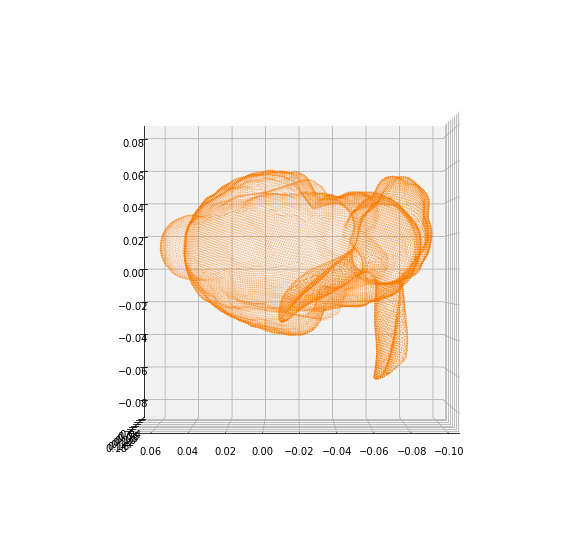

In [ ]:
# taking an example of bunny

img_file ='bun_zipper.ply' # bunny img
img = PyntCloud.from_file(img_file)
img.plot()

# Representation of 3D Images to arrays

### The arrays are being represented in the form of 3D arrays with one extra dimension of faces, and 3d arrays are represented in the form of vertices.

The mathematical representation of 3D mesh is described
below. A point in a 3D mesh is called a vertex. An edge
is formed when two vertices are joined together. A face or
polygon is a closed set of edges. A mesh containing triangle
faces is known as triangle mesh and similarly the one with
quadrilateral faces is quad mesh. Figure 1 shows 3D mesh
model of a horse.



```
vertex = numpy.array([(0, 0, 0),
...                       (0, 1, 1),
...                       (1, 0, 1),
...                       (1, 1, 0)],
...                      dtype=[('x', 'f4'), ('y', 'f4'),
...                             ('z', 'f4')])

face = numpy.array([([0, 1, 2], 255, 255, 255),
...                     ([0, 2, 3], 255,   0,   0),
...                     ([0, 1, 3],   0, 255,   0),
...                     ([1, 2, 3],   0,   0, 255)],
...                    dtype=[('vertex_indices', 'i4', (3,)),
...                           ('red', 'u1'), ('green', 'u1'),
...                           ('blue', 'u1')])
```


## First way to convert 3d Images to mathematical array



In [ ]:
plydata = PlyData.read(img_file)
print("Complete Data : ")
print(plydata.elements)
print('\n')
print("X vertexes : ")
print("Length : ", len(plydata['vertex']['x']))
print(plydata['vertex']['x'])
print('\n')
print("Y vertexes : ")
print("Length : ", len(plydata['vertex']['y']))
print(plydata['vertex']['y'])
print('\n')
print("Z vertexes : ")
print("Length : ", len(plydata['vertex']['z']))
print(plydata['vertex']['z'])

Complete Data : 
(PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('confidence', 'float'), PlyProperty('intensity', 'float')), count=35947, comments=[]), PlyElement('face', (PlyListProperty('vertex_indices', 'uchar', 'int'),), count=69451, comments=[]))


X vertexes : 
Length :  35947
[-0.0378297 -0.0447794 -0.0680095 ... -0.0704544 -0.0310262 -0.0400442]


Y vertexes : 
Length :  35947
[0.12794  0.128887 0.151244 ... 0.150585 0.153728 0.15362 ]


Z vertexes : 
Length :  35947
[ 0.00447467  0.00190497  0.0371953  ... -0.0434585  -0.00354608
 -0.00816685]


In [ ]:
print(plydata['face'].data['vertex_indices'])

[array([21216, 21215, 20399], dtype=int32)
 array([ 9186,  9280, 14838], dtype=int32)
 array([16020, 13433,  5187], dtype=int32) ...
 array([17346, 34909, 17279], dtype=int32)
 array([34909, 17346, 17277], dtype=int32)
 array([17277, 17346, 17345], dtype=int32)]


## Second way to convert 3d Images to mathematical array

In [ ]:
pcd = o3d.io.read_point_cloud(img_file)
array = np.asarray(pcd.points)
array

array([[-0.0378297 ,  0.12794   ,  0.00447467],
       [-0.0447794 ,  0.128887  ,  0.00190497],
       [-0.0680095 ,  0.151244  ,  0.0371953 ],
       ...,
       [-0.0704544 ,  0.150585  , -0.0434585 ],
       [-0.0310262 ,  0.153728  , -0.00354608],
       [-0.0400442 ,  0.15362   , -0.00816685]])

In [ ]:
# Differential Shifting Algorithm
def DifferentialShiftingTraversal(arr, node, meshVector):
  queue=[]
  visited=[0]*len(arr)
  for i in range(len(arr)):
    visited[i]=False
  visited[node]=True;
  queue.append(node);

  VectorPoints=[]

  while(len(queue)):
    currNode=queue.pop();
    VectorPoints.append(currNode.x1, currNode.x2, currNode,y1, currNode.y2)

    for j in range(len(arr[currNode])):
      if(meshVector[currNode][j]==1 and visited[j]==False):
        visited[j]=True;
        queue.append(j)
  VectorPoints=random.rand(1000)
  return VectorPoints;


In [ ]:
# Decrypton 

# for all values of x and y and z


def EncryptX(arr):
  mu = 4
  prev=4
  curr=mu*prev(1-prev);
  curr=math.ceil(curr*3)


  x=np.random.rand(1000)

  cnt=DifferentialShiftingTraversal(arr,arr.x,arr.y)

  ans=""
  for x in arr:
    l=(x[cnt]+x[cnt+1])/2
    new_diff = x[cnt]-x[cnt+1]
    
    diff = new_diff*10**3 - math.floor(new_diff*10**3)

    ans+=math.floor(new_diff*10**3)-1

    return ans;


def EncryptY(arr):
  mu = 4
  prev=4
  curr=mu*prev(1-prev);
  curr=math.ceil(curr*3)
  x=np.random.rand(1000)
  cnt=DifferentialShiftingTraversal(arr,arr.x,arr.y)

  ans=""
  for x in arr:
    l=(x[cnt]+x[cnt+1])/2
    new_diff = x[cnt]-x[cnt+1]
    diff = new_diff*10**3 - math.floor(new_diff*10**3)
    ans+=math.floor(new_diff*10**3)-1

    if(arr[cnt]>arr[cnt+1]):
      arr[cnt]=l+diff/2;
      arr[cnt+1]=l-diff/2;
    else:
      arr[cnt]=l-diff/2;
      arr[cnt+1]=l+diff/2;

    return ans;

def EncryptZ(arr):
  mu = 4
  prev=4
  curr=mu*prev(1-prev);
  curr=math.ceil(curr*3)
  x=np.random.rand(1000)
  cnt=DifferentialShiftingTraversal(arr,arr.x,arr.y)

  ans=""
  for x in arr:
    l=(x[cnt]+x[cnt+1])/2
    new_diff = x[cnt]-x[cnt+1]
    diff = new_diff*10**3 - math.floor(new_diff*10**3)
    ans+=math.floor(new_diff*10**3)-1

    if(arr[cnt]>arr[cnt+1]):
      arr[cnt]=l+diff/2;
      arr[cnt+1]=l-diff/2;
    else:
      arr[cnt]=l-diff/2;
      arr[cnt+1]=l+diff/2;

    return ans;


def Encrypt(arr):
  

  arr['x'] = DecryptX(arr['x'])
  arr['y']=DecryptY(arr['y'])
  arr['z']=DecryptZ(arr['z'])

  return arr;

In [ ]:
# Decrypton 

# for all values of x and y and z


def DecryptX(arr):
  mu = 4
  prev=4
  curr=mu*prev(1-prev);
  curr=math.ceil(curr*3)


  x=np.random.rand(1000)

  cnt=DifferentialShiftingTraversal(arr,arr.x,arr.y)

  ans=""
  for x in arr:
    l=(x[cnt]+x[cnt+1])/2
    new_diff = x[cnt]-x[cnt+1]
    
    diff = new_diff*10**3 - math.floor(new_diff*10**3)

    ans+=math.floor(new_diff*10**3)-1

    return ans;


def DecryptY(arr):
  mu = 4
  prev=4
  curr=mu*prev(1-prev);
  curr=math.ceil(curr*3)
  x=np.random.rand(1000)
  cnt=DifferentialShiftingTraversal(arr,arr.x,arr.y)

  ans=""
  for x in arr:
    l=(x[cnt]+x[cnt+1])/2
    new_diff = x[cnt]-x[cnt+1]
    diff = new_diff*10**3 - math.floor(new_diff*10**3)
    ans+=math.floor(new_diff*10**3)-1

    if(arr[cnt]>arr[cnt+1]):
      arr[cnt]=l+diff/2;
      arr[cnt+1]=l-diff/2;
    else:
      arr[cnt]=l-diff/2;
      arr[cnt+1]=l+diff/2;

    return ans;

def DecryptZ(arr):
  mu = 4
  prev=4
  curr=mu*prev(1-prev);
  curr=math.ceil(curr*3)
  x=np.random.rand(1000)
  cnt=DifferentialShiftingTraversal(arr,arr.x,arr.y)

  ans=""
  for x in arr:
    l=(x[cnt]+x[cnt+1])/2
    new_diff = x[cnt]-x[cnt+1]
    diff = new_diff*10**3 - math.floor(new_diff*10**3)
    ans+=math.floor(new_diff*10**3)-1

    if(arr[cnt]>arr[cnt+1]):
      arr[cnt]=l+diff/2;
      arr[cnt+1]=l-diff/2;
    else:
      arr[cnt]=l-diff/2;
      arr[cnt+1]=l+diff/2;

    return ans;


def Decrypt(arr):
  

  arr['x'] = DecryptX(arr['x'])
  arr['y']=DecryptY(arr['y'])
  arr['z']=DecryptZ(arr['z'])

  return arr;